In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt
plt.style.use('bmh')
figsize = (12, 5)
dpi = 600

In [3]:
D = 30
D_max = 30
D_min = 29.980

data = np.array([30.002, 30, 29.998, 29.978, 29.990, 29.992, 30, 29.994, 29.998, 29.994, 29.996, 29.998, 29.996, 30.004, 30, 29.996, 29.998, 29.992, 29.998])
data_raw = data.copy()
data.sort()
n = len(data)
data_min = min(data)
data_max = max(data)
R = round(data_max - data_min, 3)

In [4]:
print(data)
print(data_min)
print(data_max)
print(n)
print(R)

[29.978 29.99  29.992 29.992 29.994 29.994 29.996 29.996 29.996 29.998
 29.998 29.998 29.998 29.998 30.    30.    30.    30.002 30.004]
29.978
30.004
19
0.026


1: 1 [29.978;29.982333333333337)
2: 0 [29.982333333333337;29.986666666666668)
3: 1 [29.986666666666668;29.991)
4: 4 [29.991;29.995333333333335)
5: 8 [29.995333333333335;29.99966666666667)
6: 5 [29.99966666666667;30.004)


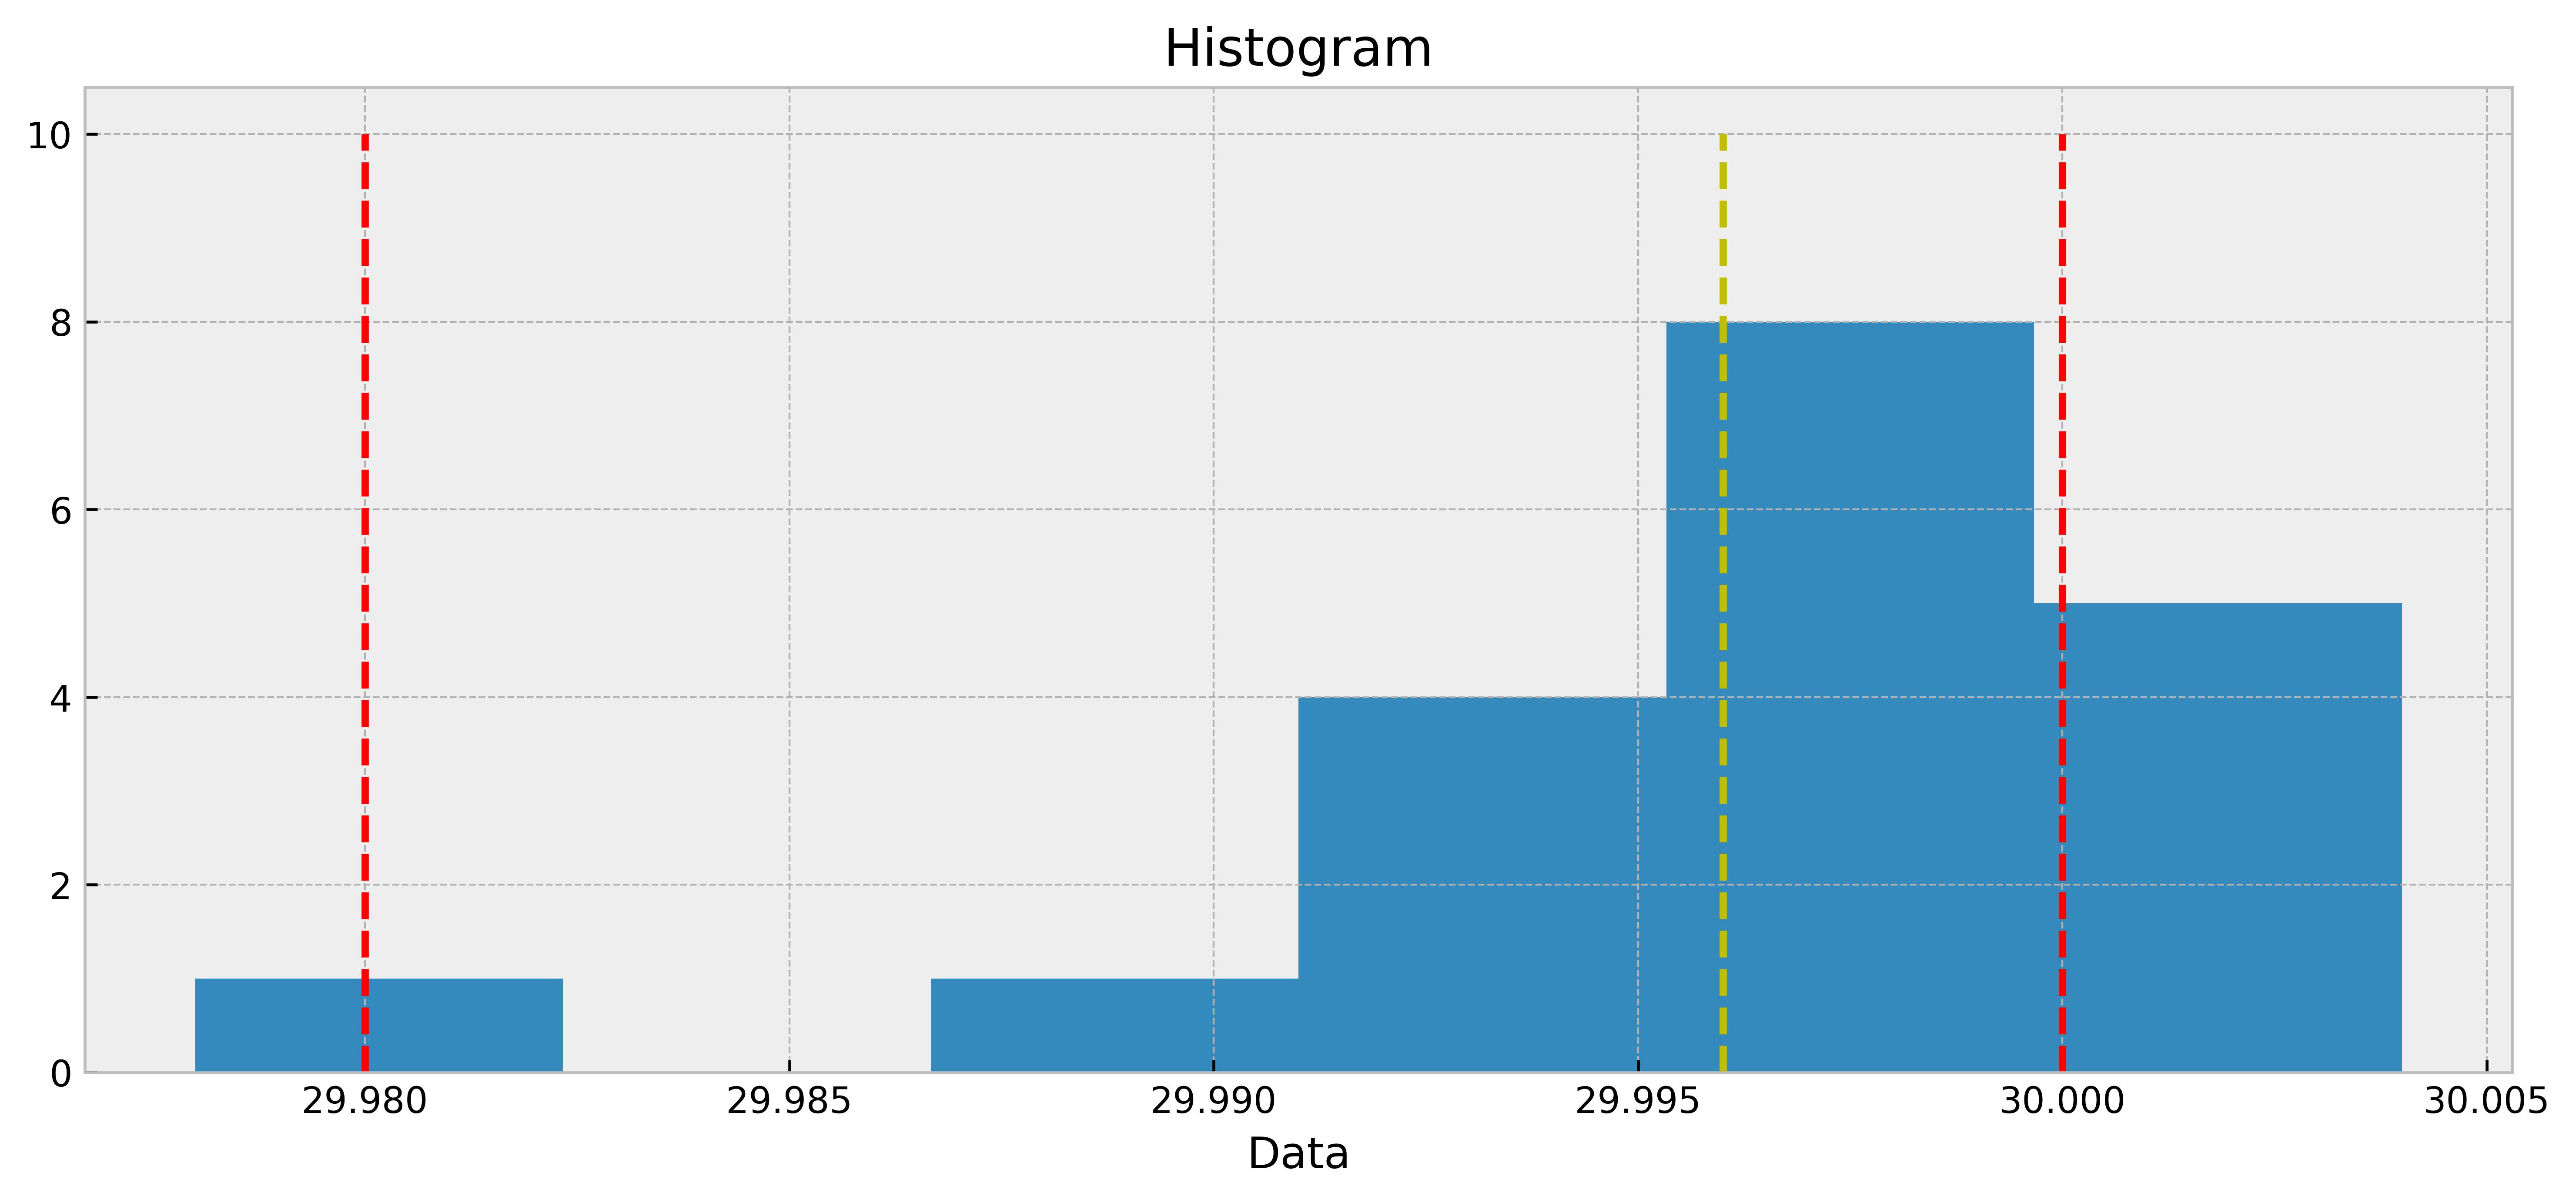

In [5]:
# bins_arr = np.array([data_min, 29.982, 29.986, 29.99, 29.994, 29.998, 30.002, data_max])
# hist_data = plt.hist(data, bins=bins_arr)
plt.figure(figsize=figsize, dpi=dpi)
hist_data = plt.hist(data, bins=6, label='dd')
plt.vlines(D_min, 0, 10, linestyle='--', color='r', label='label')
plt.vlines(D_max, 0, 10, linestyle='--', color='r')
plt.xlabel('Data')
plt.title('Histogram')

for i in range(len(hist_data[0])):
    print(f'{i+1}:', int(hist_data[0][i]), f'[{hist_data[1][i]};{hist_data[1][i+1]})')

x_hat = np.mean(data)
S = np.std(data)
vard = np.var(data)
plt.vlines(x_hat, 0, 10, linestyle='--', color='y')
plt.show()

In [6]:
a = abs(D_min - x_hat)
b = abs(D_max - x_hat)
z_a = a/S
z_b = b/S

Fza = norm.cdf(z_a) - 0.5
Fzb = norm.cdf(z_b) - 0.5

print(round(a, 3), round(b, 3))
print(round(z_a, 3), round(z_b, 3))
print(round(Fza, 5), round(Fzb, 5))

0.016 0.004
2.926 0.732
0.49829 0.26779


In [7]:
Qa = abs(0.5 - Fza)*100
Qb = abs(0.5 - Fzb)*100

print(Qa)
print(Qb)

0.17149599314548736
23.221206829695806


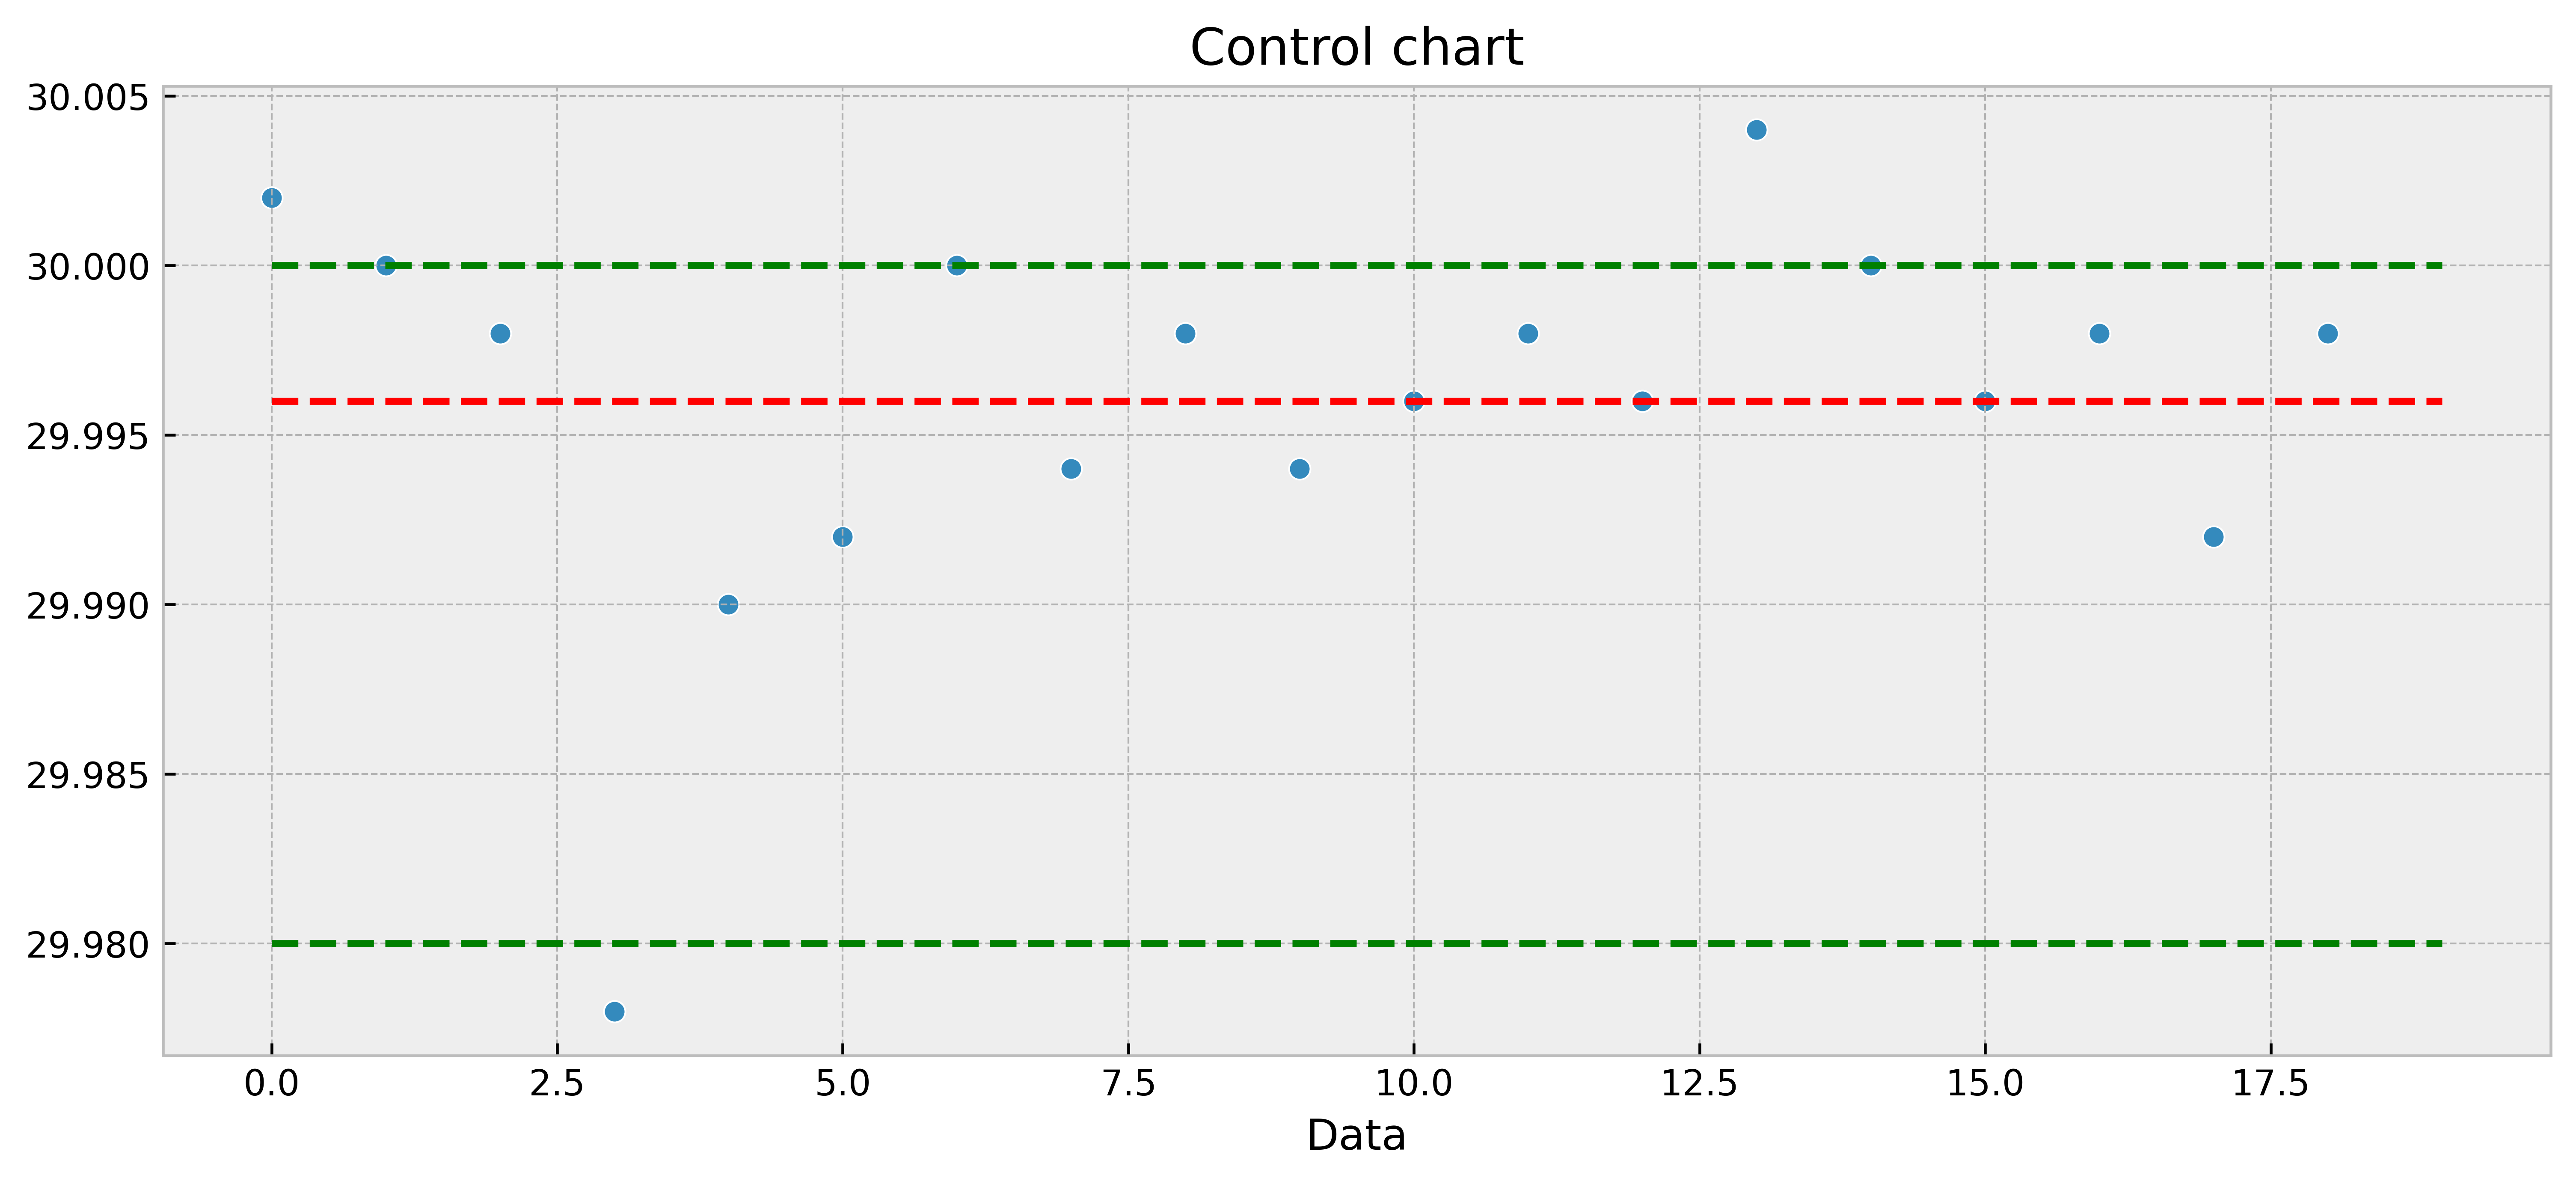

In [8]:
import seaborn as sns
plt.figure(dpi=dpi, figsize=figsize)
sns.scatterplot(data=data_raw)
plt.hlines(x_hat, 0, 19, linestyle='--', color='r')
plt.hlines(D_min, 0, 19, linestyle='--', color='g')
plt.hlines(D_max, 0, 19, linestyle='--', color='g')
plt.xlabel('Data')
plt.title('Control chart')
plt.show()